# Recunoaşterea obiectelor din imagini digitale monobiect, fără extragerea şi selecția trăsăturilor, folosind clasificatoare masini cu vectori suport (SVM) binare

In [1]:
# import os  
import cv2 
import numpy as np
import matplotlib.pyplot as plt

import sys
import ColorSpaceFunctions as clsFcts
from tabulate import tabulate
from sklearn import metrics

In [2]:
# Functia pentru formarea vectorului de trasaturi
def ImgFeatExtr(fileName, rszFct, clSpCod,imgComps):
    # citire imagine si conversie BGR to RGB
    imgRGB = cv2.cvtColor(cv2.imread(fileName) , cv2.COLOR_BGR2RGB) 
    newShape = (int(imgRGB.shape[0]*rszFct),int(imgRGB.shape[1]*rszFct))
    imgRsz = cv2.resize(imgRGB, newShape, interpolation = cv2.INTER_NEAREST)
    if (NewColorSpace=='R/G/B'):
        ImgClrSp = imgRsz
    elif (NewColorSpace=='gray'):
        ImgClrSp = cv2.cvtColor(imgRsz , cv2.COLOR_RGB2GRAY) 
    else:
        ImgClrSp = clsFcts.ConvertColorSpace(imgRsz, 'R/G/B' , NewColorSpace)
    ImgClrSp = ImgClrSp/255
    if (NewColorSpace=='gray'):
        Img1D = np.reshape(ImgClrSp[:,:],(ImgClrSp.shape[0]*ImgClrSp.shape[1],))
    else:
        Img1D = np.reshape(ImgClrSp[:,:,imgComps],(ImgClrSp.shape[0]*ImgClrSp.shape[1] *imgComps.shape[0],))
    # plt.imshow(imgRsz); plt.show();
    return Img1D

def EvalModelCls(y_a, y_a_pred, y_b, y_b_pred, ta, tb):
    acc_a = np.round(metrics.accuracy_score(y_a, y_a_pred)*100,5)
    acc_b =np.round(metrics.accuracy_score(y_b, y_b_pred)*100,5)
    cf_a = metrics.confusion_matrix(y_a, y_a_pred)
    cf_b = metrics.confusion_matrix(y_b, y_b_pred)
    
    print('\n  Evaluare clasificare:  \n')
    tabel = []
    for i in range (0,cf_a.shape[0]):
        tabel.append([str(cf_a[i,:]), str(cf_b[i,:])])
    headers=[ta+", Accuracy: "+str(acc_a)+",\n Confusion Matrix: ", 
             tb+", Accuracy: "+str(acc_b)+",\n Confusion Matrix: "]
    print(tabulate(tabel, headers, colalign=("center","center")))
    return [acc_a, acc_b, cf_a, cf_b]    

In [3]:

# In[2] Setare parametrii
    
# Setare director imagini - cu subdirectoare pe obiecte 
pathData = '/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstObjClassif_lab10_11/'

# Setare obiecte posibile pentru clasificare
objNames = np.array(['apple','pear','tomato','cow','horse','dog']) 

# Considered objects 
# Alegerea obiectelor pe care se merge in clasificare
# ['apple'=0,'pear'=1,'tomato'=2 ,'cow'=3,'horse'= 4,'dog'=5]
clsObjs = np.array([0, 1])

# Clasificare binara - doar doua clase se pot alege!
if (clsObjs.shape[0]>2): # daca s-au ales mai mult de 2 clase
    clsObjs = clsObjs[0:2] # se pastreaza doar primele 2

# Imaginile obiect se redimensioneaza - miscsoreaza
#   in clasificare folosim varianta redusa
#   se vor testa 0.1/ 0.15/ 0.25/ 0.75 
ResizeFactor = 0.25 # valoare intre [0,1] - pentru micsorare imagine

# Setare numar de imagini care vor fi considerate la testare 
#    (retul imaginilor vor fi utilizare la antrenare)
test_size = 0.3     # 0.3 / 0.5 / 0.7 

# Setare spatiu de culoare in care este reprezentata imaginea
# ['R/G/B' = 0, 'Y/Cr/Cb' = 1, 'H/S/V' = 2, 'L/a/b' = 3] 
SelClrSp = 1

# Setare componete  pentru spatiu de culoare care se considera in clasificare
#imgComps = np.array([0]) #  se considera doar C = 0, componenta Y pentru YCrCb = gray
imgComps = np.array([0, 1, 2]) # [C1 = 0, C2 = 1, C3 = 2]

In [4]:
ColorSpacesList = ['R/G/B', 'Y/Cr/Cb', 'H/S/V', 'L/a/b'] 
NewColorSpace = ColorSpacesList[SelClrSp] 

print('\n Clasele considerate in clasificare: ', objNames[clsObjs])
print(' Spatiu de culoare utilizat: '+ NewColorSpace)
print(' Componente utilizate: ', np.array(NewColorSpace.split('/'))[imgComps])
print(' Imaginile vor fi redimensionate/ miscsorate cu factorul de: ', ResizeFactor)

# In[3] Citire imagini si formarea setului de date sub forma X, y
# Subdirectoare cu imagini a unui singur obiect cu diverse view-uri 
# Subdirectoare multiple pentru obiecte din aceasi clasa

import glob

# Citim toate imaginile din directorul pathData utilizate in aplicatie

X = []; y=[]; flName = []
for i in range(0, len(clsObjs)): #consideram fiecare forma
    clsName = objNames[clsObjs[i]]
    objDirs = glob.glob(pathData + clsName + "*")
    for j in range(0,len(objDirs)): # nr de imagini pentru fiecare forma
        objFls = glob.glob(objDirs[j] + "/*.png")
        for k in range(0,len(objFls)):
            X.append(ImgFeatExtr(objFls[k], ResizeFactor, NewColorSpace, imgComps))
            y.append(i)
            flName.append(objFls[k])
  
# X vectorul de trasaturi 
X = np.asarray(X) 
# y - vector cu labelurile fiecarei imagini
y = np.asarray(y) 

imgRez = np.sqrt(X.shape[1]/imgComps.shape[0]).astype(int) 
print('     - rezolutia imaginilor redimensionate: ', imgRez , "x", imgRez)
print(' Setul de date: X.shape: ', X.shape , ', y.shape: ', y.shape)


 Clasele considerate in clasificare:  ['apple' 'pear']
 Spatiu de culoare utilizat: Y/Cr/Cb
 Componente utilizate:  ['Y' 'Cr' 'Cb']
 Imaginile vor fi redimensionate/ miscsorate cu factorul de:  0.25
     - rezolutia imaginilor redimensionate:  32 x 32
 Setul de date: X.shape:  (820, 3072) , y.shape:  (820,)


In [5]:
# In[4] # divizare date in set de antrenare si set de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
print(' Se pastreaza ', test_size*100, "[%] valori in setul de test, astfel ")
print('     - setul de date este impartit: ', X_train.shape[0],'date train, ',  X_test.shape[0],'date test' )


# In[] SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print('\n------------------------------------------------------- ')
print('\n ------ Aplicare SVM ----------')

opt_par_svm = True; # True or False
if (not(opt_par_svm)):
    nkernel =  'linear' #  'linear','poly', 'rbf'
    model_svm = SVC(kernel = nkernel, random_state = 0)
    model_svm.fit(X_train, y_train)
    print(' Model SVM - kernel:', model_svm.kernel)
else: 
    print(' S-a ales optimizare parametri SVM !!!!')
    param_grid = {'kernel':['linear', 'rbf','poly'], 
                  'degree':[2,3],
                  'C': [0.1,1, 10, 100], 
                  'gamma': [10,1,0.1,0.01,0.001]} 
    model_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
    model_svm.fit(X_train, y_train)
    print(' Parametrii optimi obtinuti: ', model_svm.best_params_)

# Predicting the Test set results
y_pred_trn = model_svm.predict(X_train)
y_pred_tst = model_svm.predict(X_test)

[acc_trn_svm, acc_tst_svm, cf_trn_svm, cf_tst_svm] = EvalModelCls(y_train, y_pred_trn, 
                                                                  y_test, y_pred_tst,
                                                                  "Train Set", "Test Set")



 Se pastreaza  30.0 [%] valori in setul de test, astfel 
     - setul de date este impartit:  574 date train,  246 date test

------------------------------------------------------- 

 ------ Aplicare SVM ----------
 S-a ales optimizare parametri SVM !!!!
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Parametrii optimi obtinuti:  {'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'linear'}

  Evaluare clasificare:  

 Train Set, Accuracy: 100.0,    Test Set, Accuracy: 100.0,
      Confusion Matrix:             Confusion Matrix:
-----------------------------  ----------------------------
          [287   0]                     [123   0]
          [  0 287]                     [  0 123]


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.2min finished



 ------ Aplicare LDA ----------
 Afisare proiectii 1D a imaginilor 
  * rosu clasa 1, albastru clasa 2 - reprezentare usor deplasata pentru vizibilitate  
       - sus setul de imagini de la antrenare (reprezentat prin stea) 
       - jos setul de imagini de la de testare (reprezentat prin punct)


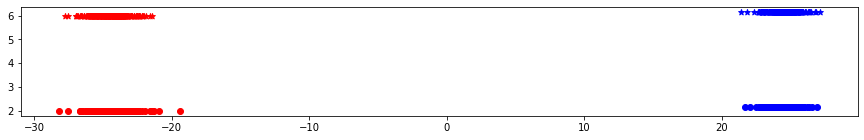


  Evaluare clasificare:  

 Train Set, Accuracy: 100.0,    Test Set, Accuracy: 100.0,
      Confusion Matrix:             Confusion Matrix:
-----------------------------  ----------------------------
          [287   0]                     [123   0]
          [  0 287]                     [  0 123]


In [6]:
# In[4] Applying LDA - clasificator binar
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print('\n ------ Aplicare LDA ----------')
# Reducerea spatiului de trasaturi la 1D prin aplicare LDA
# - fiecare imagine este reprezentata print-o singura valoare
model_lda = LDA(n_components = 1)
X_train_lda = model_lda.fit_transform(X_train, y_train)
X_test_lda = model_lda.transform(X_test)

# Daca proiectia imaginii este pozitiva => face parte din clasa 1
# Daca proiectia imaginii este negativa => face parte din clasa 0

# Etichetare set antrenare
y_pred_trn = np.zeros(X_train_lda.shape[0],) 
y_pred_trn[ np.where(X_train_lda>0) [0] ] = 1

# Etichetare set test
y_pred_tst = np.zeros(X_test_lda.shape[0],) 
y_pred_tst[ np.where(X_test_lda>0) [0] ] = 1

# Afisare grafica proiectii
af = True #
if (af): 
    # print('\n ---------------------------------- ')
    print(' Afisare proiectii 1D a imaginilor ')
    print('  * rosu clasa 1, albastru clasa 2 - reprezentare usor deplasata pentru vizibilitate  ')
    print('       - sus setul de imagini de la antrenare (reprezentat prin stea) ')
    print('       - jos setul de imagini de la de testare (reprezentat prin punct)')
    clabel = ['r', 'b']
    fig = plt.figure(figsize=(15,2))
    
    for i in range(0,X_test_lda.shape[0]):
        plt.scatter(X_test_lda[i,0],2+0.15*y_test[i], c=clabel[y_test[i]], marker='o')
    
    # fig = plt.figure(figsize=(15,1))
    for i in range(0,X_train_lda.shape[0]):
        plt.scatter(X_train_lda[i,0],6+0.15*y_train[i], c=clabel[y_train[i]], marker='*')
    
    plt.show()

# Calcul metrici evaluare
from sklearn import metrics

[acc_trn_lda, acc_tst_lda, cf_trn_lda, cf_tst_lda] = EvalModelCls(y_train, y_pred_trn, 
                                                                  y_test, y_pred_tst,
                                                                  "Train Set", "Test Set")


In [7]:
# In[] Mod trecere valori in tabel

valsTbl  =  np.array([[acc_trn_lda, acc_tst_lda, acc_trn_svm, acc_tst_svm]])
print ("\n Valorile de trecut in tabel, in variabila valsTbl: \n", valsTbl)


 Valorile de trecut in tabel, in variabila valsTbl: 
 [[100. 100. 100. 100.]]
